# Projet Intelligence Artificielle et Robotique : Reinforcement Learning in Continuous Action Spaces 

Source : https://www.researchgate.net/publication/4249966_Reinforcement_Learning_in_Continuous_Action_Spaces/link/0912f5093a214c7f1b000000/download

Ce notebook présente différente version de l'algorithme d'apprentissage par renforcement Actor Critic. On implémentera aussi les versions améliorées présente dans le papier ci-dessus dont l'algorithme CACLA+VAR en-ligne.
Algorithmes on-line implémentés: 
- Actor Critic Discret (**AC**) - Taxi-v3 / CliffWalking-v0 - Discret action and observation spaces
- Actor Critic Discret (**ACLA**) - Taxi-v3 / CliffWalking-v0 - Discret action and observation spaces

- Continuous Actor Critic (**CAC**) - CartPole-v0 / LunarLander-v2 - Continuous observation spaces and Discret action spaces
- Continuous Actor Critic (**CAC**) - LunarLanderContinuous-v2 - Continuous action and observation spaces
- Continuous Actor Critic (**CACLA**) - LunarLanderContinuous-v2 - Continuous action and observation spaces
- Continuous Actor Critic (**CACLA+VAR**) - LunarLanderContinuous-v2 - Continuous action and observation spaces

## Import de librairies

In [11]:
import gym
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

## Actor Critic Naif Discret (AC) - Taxi-v3

In [71]:
env = gym.make("Taxi-v3")
print(f"action space : {env.action_space.n}")
print(f"observation space : {env.observation_space.n}")
action_space = env.action_space.n
observation_space = env.observation_space.n

action space : 6
observation space : 500


### Fonction de test

In [72]:
def test(actor) : 
    cum_rewards = 0.0
    state = env.reset()
    done = False
    while not done :
        action =  np.random.choice(np.arange(action_space), p=actor[state,:]) # tirage sur les actions
        new_state, reward, done , _ = env.step(action)
        cum_rewards += reward
        state = new_state
    return cum_rewards

### Initialisation Acteur et Critique

In [73]:
critic = np.zeros(observation_space) # critique
actor = np.zeros((observation_space,action_space)) # actor

# initialisation actor
for s in range(actor.shape[0]) :
    actor[s,:] = np.ones(action_space) / action_space

### Hyper-paramètres

In [74]:
discount_factor = 0.99
eps = 0.15
learning_rate_critic = 0.09
learning_rate_actor = 0.7
nb_episode = 10000
test_frequency = 10
nb_tests = 5

### Apprentissage

In [75]:
list_rewards_mean_1 = list()
list_rewards_std_1 = list()

for episode in tqdm(range(nb_episode)) : 
    
    state = env.reset()

    done = False

    while not done :

        # choix de l'action

        if np.random.rand() < eps :
            # exploration
            action = env.action_space.sample()
        else: 
            # exploitation
            action = np.random.choice(np.arange(action_space), p=actor[state,:]) # tirage sur les actions

        new_state, reward, done , _ = env.step(action)

        td_error = reward + discount_factor * critic[new_state] - critic[state]

        critic[state] += learning_rate_critic * td_error

        actor[state,action] += learning_rate_actor * td_error

        # renormalisation du vecteur de proba 
        actor[state,:] = np.exp(actor[state,:])/sum(np.exp(actor[state,:]))

        state = new_state
        
    if episode % test_frequency == 0 :    
        list_tests = list()
        for t in range(nb_tests) :
            list_tests.append(test(actor))
        list_tests = np.array(list_tests)
        list_rewards_mean_1.append( list_tests.mean() )
        list_rewards_std_1.append( list_tests.std() )

100%|████████████████████████████████████| 10000/10000 [00:36<00:00, 270.42it/s]


### Résultats

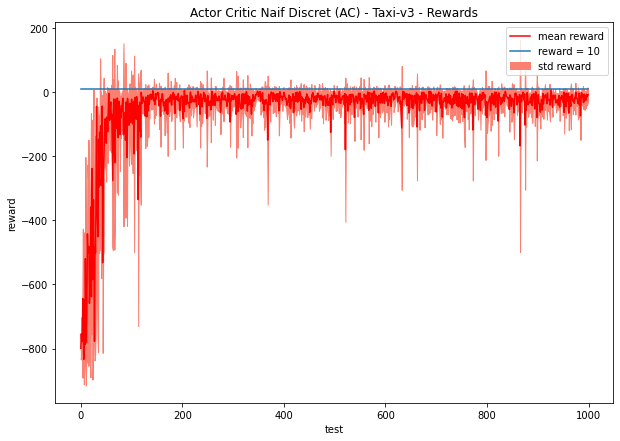

In [76]:
plt.figure(figsize=(10,7))
list_mean1_1 = np.array(list_rewards_mean_1) + np.array(list_rewards_std_1)
list_mean2_1 = np.array(list_rewards_mean_1) - np.array(list_rewards_std_1)
plt.fill_between(np.arange(0,len(list_rewards_mean_1),1),list_mean1_1,list_mean2_1, color = 'salmon', label = 'std reward')
plt.plot(np.arange(0,len(list_rewards_mean_1),1),list_rewards_mean_1, c= 'r',label = 'mean reward')
plt.plot(np.arange(0,len(list_rewards_mean_1),1) , (np.zeros(len(list_rewards_mean_1))+10) , label = "reward = 10")
plt.legend()
plt.xlabel('test')
plt.ylabel('reward')
plt.title('Actor Critic Naif Discret (AC) - Taxi-v3 - Rewards')
plt.show()

## Actor Critic Naif Discret (AC) - CliffWalking-v0

In [77]:
env = gym.make("CliffWalking-v0")
print(f"action space : {env.action_space.n}")
print(f"observation space : {env.observation_space.n}")
action_space = env.action_space.n
observation_space = env.observation_space.n

action space : 4
observation space : 48


### Fonction de test

In [78]:
def test(actor) : 
    cum_rewards = 0.0
    state = env.reset()
    done = False
    while not done :
        action =  np.random.choice(np.arange(action_space), p=actor[state,:]) # tirage sur les actions
        new_state, reward, done , _ = env.step(action)
        cum_rewards += reward
        state = new_state
    return cum_rewards

### Initialisation Acteur et Critique

In [79]:
critic = np.zeros(observation_space) # critique
actor = np.zeros((observation_space,action_space)) # actor

# initialisation actor
for s in range(actor.shape[0]) :
    actor[s,:] = np.ones(action_space) / action_space

### Hyper-paramètres

In [80]:
discount_factor = 0.99
eps = 0.15
learning_rate_critic = 0.009
learning_rate_actor = 0.02
nb_episode = 10000
test_frequency = 10
nb_tests = 5

### Apprentissage

In [81]:
list_rewards_mean_2 = list()
list_rewards_std_2 = list()

for episode in tqdm(range(nb_episode)) : 
    
    state = env.reset()

    done = False

    while not done :

        # choix de l'action

        if np.random.rand() < eps :
            # exploration
            action = env.action_space.sample()
        else: 
            # exploitation
            action = np.random.choice(np.arange(action_space), p=actor[state,:]) # tirage sur les actions

        new_state, reward, done , _ = env.step(action)

        td_error = reward + discount_factor * critic[new_state] - critic[state]

        critic[state] += learning_rate_critic * td_error

        actor[state,action] += learning_rate_actor * td_error

        # renormalisation du vecteur de proba 
        actor[state,:] = np.exp(actor[state,:])/sum(np.exp(actor[state,:]))

        state = new_state
        
    if episode % test_frequency == 0 :    
        list_tests = list()
        for t in range(nb_tests) :
            list_tests.append(test(actor))
        list_tests = np.array(list_tests)
        list_rewards_mean_2.append( list_tests.mean() )
        list_rewards_std_2.append( list_tests.std() )

100%|█████████████████████████████████████| 10000/10000 [04:27<00:00, 37.37it/s]


### Résultats

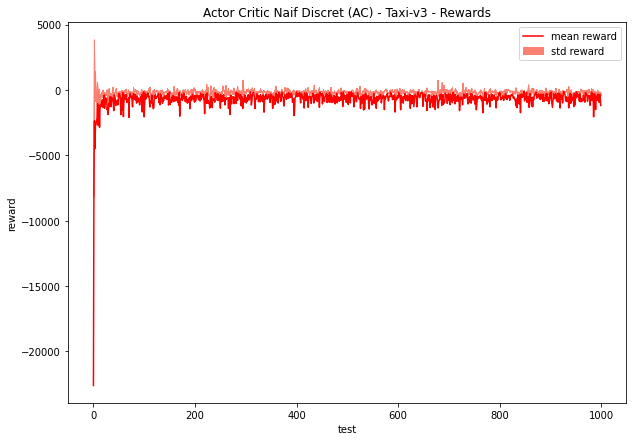

In [82]:
plt.figure(figsize=(10,7))
list_mean1_2 = np.array(list_rewards_mean_2) + np.array(list_rewards_std_2)
list_mean2_2 = np.array(list_rewards_mean_2) - np.array(list_rewards_std_2)
plt.fill_between(np.arange(0,len(list_rewards_mean_2),1),list_mean1_2,list_mean2_2, color = 'salmon', label = 'std reward')
plt.plot(np.arange(0,len(list_rewards_mean_2),1),list_rewards_mean_2, c= 'r',label = 'mean reward')
plt.legend()
plt.xlabel('test')
plt.ylabel('reward')
plt.title('Actor Critic Naif Discret (AC) - Taxi-v3 - Rewards')
plt.show()

## Actor Critic Discret (ACLA) - Taxi-v3

## Actor Critic Discret (ACLA) - CliffWalking-v0

## Continuous Actor Critic (CAC) - CartPole-v0

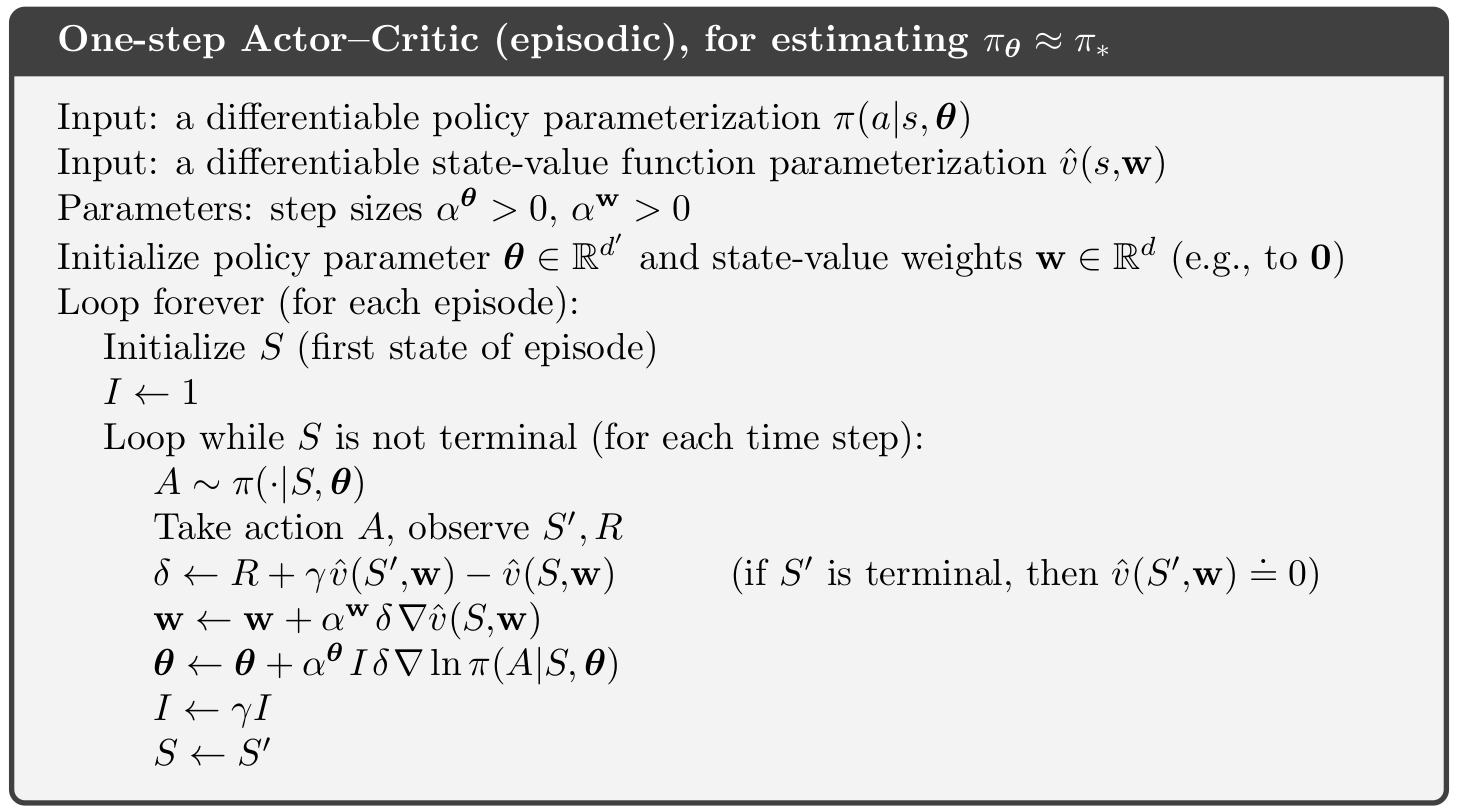

Source : https://ai.stackexchange.com/questions/17624/how-does-the-update-rule-for-the-one-step-actor-critic-method-work

In [143]:
import torch
import torch.nn as nn

In [144]:
env = gym.make("CartPole-v0")
print(f"action space : {env.action_space}")
print(f"observation space : {env.observation_space}")
action_space = 2
observation_space = 4

action space : Discrete(2)
observation space : Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


### Réseaux de neurones Acteur et Critique (FAs)

In [308]:
class ActorNetwork(nn.Module) :
    
 
    def __init__(self) -> None:
        super().__init__()


        self.net = nn.Sequential(
            nn.Linear(observation_space, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,action_space),
            nn.Softmax(dim=0)
        )

    def forward(self,x):
        return self.net(x)
    
    
class CriticNetwork(nn.Module) :
    
    def __init__(self) -> None:
        super().__init__()


        self.net = nn.Sequential(
            nn.Linear(observation_space, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,1)
        )

    def forward(self,x):
        return self.net(x)

### Fonction de test

In [309]:
def test(actor) : 
    cum_rewards = 0.0
    state = env.reset()
    done = False
    while not done :
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  np.random.choice(np.arange(action_space), p=actor(state_t).detach().numpy()) # tirage sur les actions
        new_state, reward, done , _ = env.step(action)
        cum_rewards += reward
        state = new_state
    return cum_rewards

### Hyper-paramètres

In [382]:
discount_factor = 0.99
eps = 0.1
learning_rate_critic =  5.5e-4 # 3e-2  
learning_rate_actor =  1.5e-4 
nb_episode = 1000
test_frequency = 10
nb_tests = 5

### Initialisation Acteur et Critique

In [383]:
actor = ActorNetwork()
critic = CriticNetwork()

optimizer_actor = torch.optim.Adam(actor.parameters(),lr=learning_rate_actor)
optimizer_critic = torch.optim.Adam(critic.parameters(),lr=learning_rate_critic)

### Apprentissage

In [384]:
list_rewards_mean_3 = list()
list_rewards_std_3 = list()

for episode in tqdm(range(nb_episode)) : 
    
    state = env.reset()

    done = False
    
    I = 1.0
    
    while not done :
        
        state_t = torch.as_tensor(state , dtype=torch.float32)
        p = torch.distributions.utils.clamp_probs(actor(state_t))
        
        # choix de l'action
        if np.random.rand() < eps :
            # exploration
            action = env.action_space.sample()
        else: 
            # exploitation
            action =  np.random.choice(np.arange(action_space), p=p.detach().numpy()) # tirage sur les actions
            
        new_state, reward, done , _ = env.step(action)

        new_state_t = torch.as_tensor(new_state , dtype=torch.float32)
        reward_t = torch.as_tensor(reward , dtype=torch.float32)
        
        with torch.no_grad():
            td_error = reward_t + discount_factor * (1 - done) * critic(new_state_t) - critic(state_t)
        
        # learning critic
        
        loss_critic = - td_error.detach() * critic(state_t)
        
        optimizer_critic.zero_grad()
        loss_critic.backward()
        optimizer_critic.step()
        
        # learning actor
 
        loss_actor = - I * td_error.detach() * torch.log(p[action])

        optimizer_actor.zero_grad()
        loss_actor.backward()
        optimizer_actor.step()
        
        I *= discount_factor
        state = new_state
        
    if episode % test_frequency == 0 :    
        list_tests = list()
        for t in range(nb_tests) :
            list_tests.append(test(actor))
        list_tests = np.array(list_tests)
        list_rewards_mean_3.append( list_tests.mean() )
        list_rewards_std_3.append( list_tests.std() )

100%|███████████████████████████████████████| 1000/1000 [07:35<00:00,  2.20it/s]


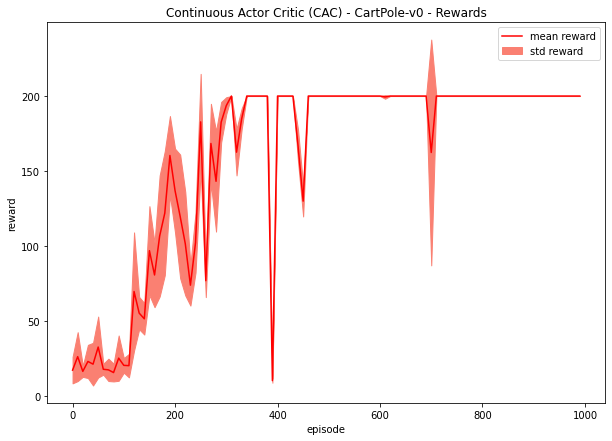

In [385]:
plt.figure(figsize=(10,7))
list_mean1_3 = np.array(list_rewards_mean_3) + np.array(list_rewards_std_3)
list_mean2_3 = np.array(list_rewards_mean_3) - np.array(list_rewards_std_3)
plt.fill_between(np.arange(0,nb_episode,test_frequency),list_mean1_3,list_mean2_3, color = 'salmon', label = 'std reward')
plt.plot(np.arange(0,nb_episode,test_frequency),list_rewards_mean_3, c= 'r',label = 'mean reward')
plt.legend()
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('Continuous Actor Critic (CAC) - CartPole-v0 - Rewards')
plt.show()

## Continuous Actor Critic (CAC) - LunarLander-v2 

## Continuous Actor Critic (CAC) - LunarLanderContinuous-v2

## Continuous Actor Critic (CACLA) - LunarLanderContinuous-v2

## Continuous Actor Critic (CACLA+VAR) - LunarLanderContinuous-v2

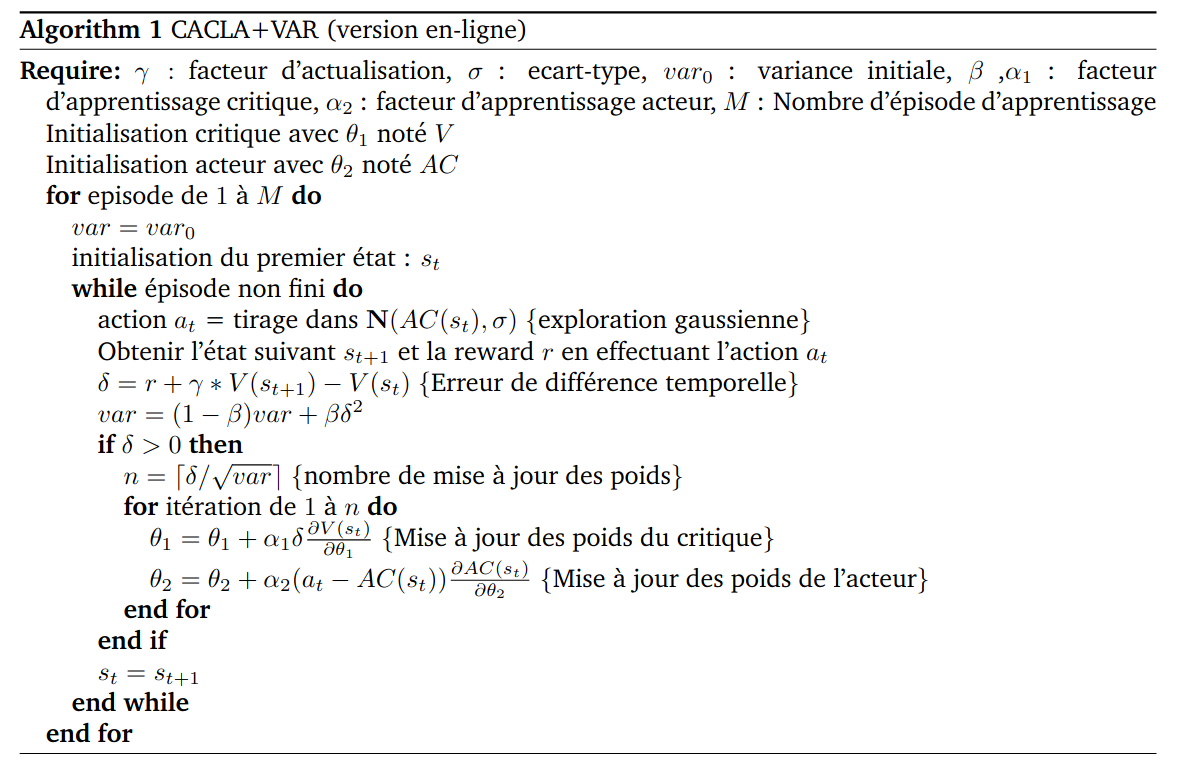

In [397]:
env = gym.make("LunarLanderContinuous-v2")
print(f"action space : {env.action_space}")
print(f"observation space : {env.observation_space}")
action_space = 2
observation_space = 8

action space : Box([-1. -1.], [1. 1.], (2,), float32)
observation space : Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)


In [471]:
class ActorNetwork(nn.Module) :
    
 
    def __init__(self) -> None:
        super().__init__()


        self.net = nn.Sequential(
            nn.Linear(observation_space, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,action_space)
        )

    def forward(self,x):
        return self.net(x)
    
    
class CriticNetwork(nn.Module) :
    
    def __init__(self) -> None:
        super().__init__()


        self.net = nn.Sequential(
            nn.Linear(observation_space, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,1)
        )

    def forward(self,x):
        return self.net(x)

In [472]:
def test(actor) : 
    cum_rewards = 0.0
    state = env.reset()
    done = False
    while not done :
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  actor(state_t).detach().numpy() # tirage sur les actions
        new_state, reward, done , _ = env.step(action)
        cum_rewards += reward
        state = new_state
    return cum_rewards

In [485]:
discount_factor = 0.99
learning_rate_critic =  7.5e-4 # 3e-2  
learning_rate_actor =  1.5e-4 
sigma = [1,1]
beta = 0.001
var_0 = 1
nb_episode = 6000
test_frequency = 10
nb_tests = 5

In [486]:
actor = ActorNetwork()
critic = CriticNetwork()


optimizer_critic = torch.optim.Adam(critic.parameters(),lr=learning_rate_critic)

In [487]:
np.std(np.random.normal(loc=[0,0],scale=[1,1],size=(10,2)),axis=0)

array([1.37861276, 0.76092104])

In [488]:

state = env.reset()
state_t = torch.as_tensor(state , dtype=torch.float32)
action = torch.as_tensor(np.array(np.random.normal(loc=actor(state_t).detach().numpy(),scale=sigma,size=(1,action_space))),dtype=torch.float32)[0]
print(action)
print(env.step(action.detach().numpy()))

tensor([ 2.6551, -0.3287])
(array([-5.9642794e-04,  1.4094794e+00, -3.8143542e-02, -1.8946452e-02,
       -3.7544908e-04, -1.2478586e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32), 0.45053111048069355, False, {})


In [489]:
list_rewards_mean_4 = list()
list_rewards_std_4 = list()

for episode in tqdm(range(nb_episode)) : 
    
    var = var_0
    
    state = env.reset()

    done = False
    
    while not done :
        
        state_t = torch.as_tensor(state , dtype=torch.float32)
        
        action = torch.as_tensor(np.array(np.random.normal(loc=actor(state_t).detach().numpy(),scale=sigma,size=(1,action_space))),dtype=torch.float32)[0].detach().numpy()

        new_state, reward, done , _ = env.step(action)

        new_state_t = torch.as_tensor(new_state , dtype=torch.float32)
        reward_t = torch.as_tensor(reward , dtype=torch.float32)
        
        with torch.no_grad():
            td_error = reward_t + discount_factor * (1 - done) * critic(new_state_t) - critic(state_t)
        
        var = (1 - beta) * var + beta*(td_error**2)
        
        if td_error > 0 :
            
            n = int(np.ceil( td_error.item() / np.sqrt(var.item()) ))
            
            for i in range(n) :
                
                # learning critic
                
                loss_critic = - td_error.detach() * critic(state_t)

                optimizer_critic.zero_grad()
                loss_critic.backward()
                optimizer_critic.step()

                # learning actor
                std = np.sqrt(var.item())
                lr_actor = td_error.item() / std
                optimizer_actor = torch.optim.Adam(actor.parameters(),lr=lr_actor)
                
                action_t = torch.as_tensor(action , dtype=torch.float32)
                loss_actor = ( (action_t - actor(state_t).detach()) * actor(state_t) ).mean()
                

                optimizer_actor.zero_grad()
                loss_actor.backward()
                optimizer_actor.step()
        
        state = new_state
        
    if episode % test_frequency == 0 :    
        list_tests = list()
        for t in range(nb_tests) :
            list_tests.append(test(actor))
        list_tests = np.array(list_tests)
        list_rewards_mean_4.append( list_tests.mean() )
        list_rewards_std_4.append( list_tests.std() )

100%|███████████████████████████████████████| 6000/6000 [29:40<00:00,  3.37it/s]


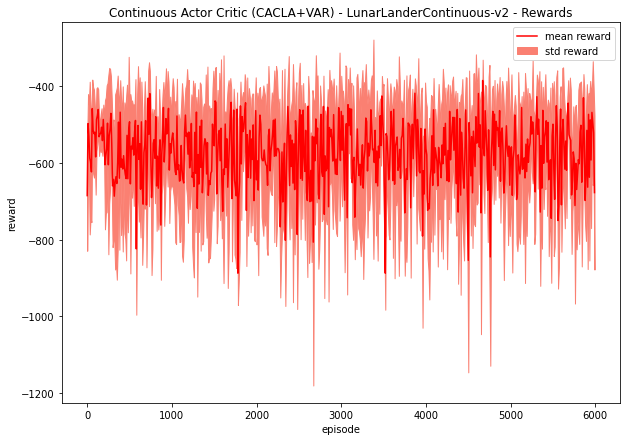

In [490]:
plt.figure(figsize=(10,7))
list_mean1_4 = np.array(list_rewards_mean_4) + np.array(list_rewards_std_4)
list_mean2_4 = np.array(list_rewards_mean_4) - np.array(list_rewards_std_4)
plt.fill_between(np.arange(0,nb_episode,test_frequency),list_mean1_4,list_mean2_4, color = 'salmon', label = 'std reward')
plt.plot(np.arange(0,nb_episode,test_frequency),list_rewards_mean_4, c= 'r',label = 'mean reward')
plt.legend()
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('Continuous Actor Critic (CACLA+VAR) - LunarLanderContinuous-v2 - Rewards')
plt.show()